In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

## Load data
Dataset contains 21,613 house sale records in 21 variables. From [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [18]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


## Prepare target variable and features

In [20]:
target = df[df["price"] <= 3000000]["price"].apply(lambda x: np.log(x))

In [21]:
features = pd.DataFrame()
features["sqft_living_log"] = df[df["price"] <= 3000000]["sqft_living"].apply(lambda x: np.log(x))
features["sqft_lot_log"] = df[df["price"] <= 3000000]["sqft_lot"].apply(lambda x: np.log(x))
features["bedrooms"] = df[df["price"] <= 3000000]["bedrooms"]
features["bathrooms"] = df[df["price"] <= 3000000]["bathrooms"]
features["waterfront"] = df[df["price"] <= 3000000]["waterfront"]
features["age_log"] = np.log((df[df["price"] <= 3000000]["date"].apply(lambda x: float(x[0:4]))) - (df[df["price"] <= 3000000]["yr_built"]) + 2)
features["condition_sqrt"] = df[df["price"] <= 3000000]["condition"].apply(lambda x: np.sqrt(x))

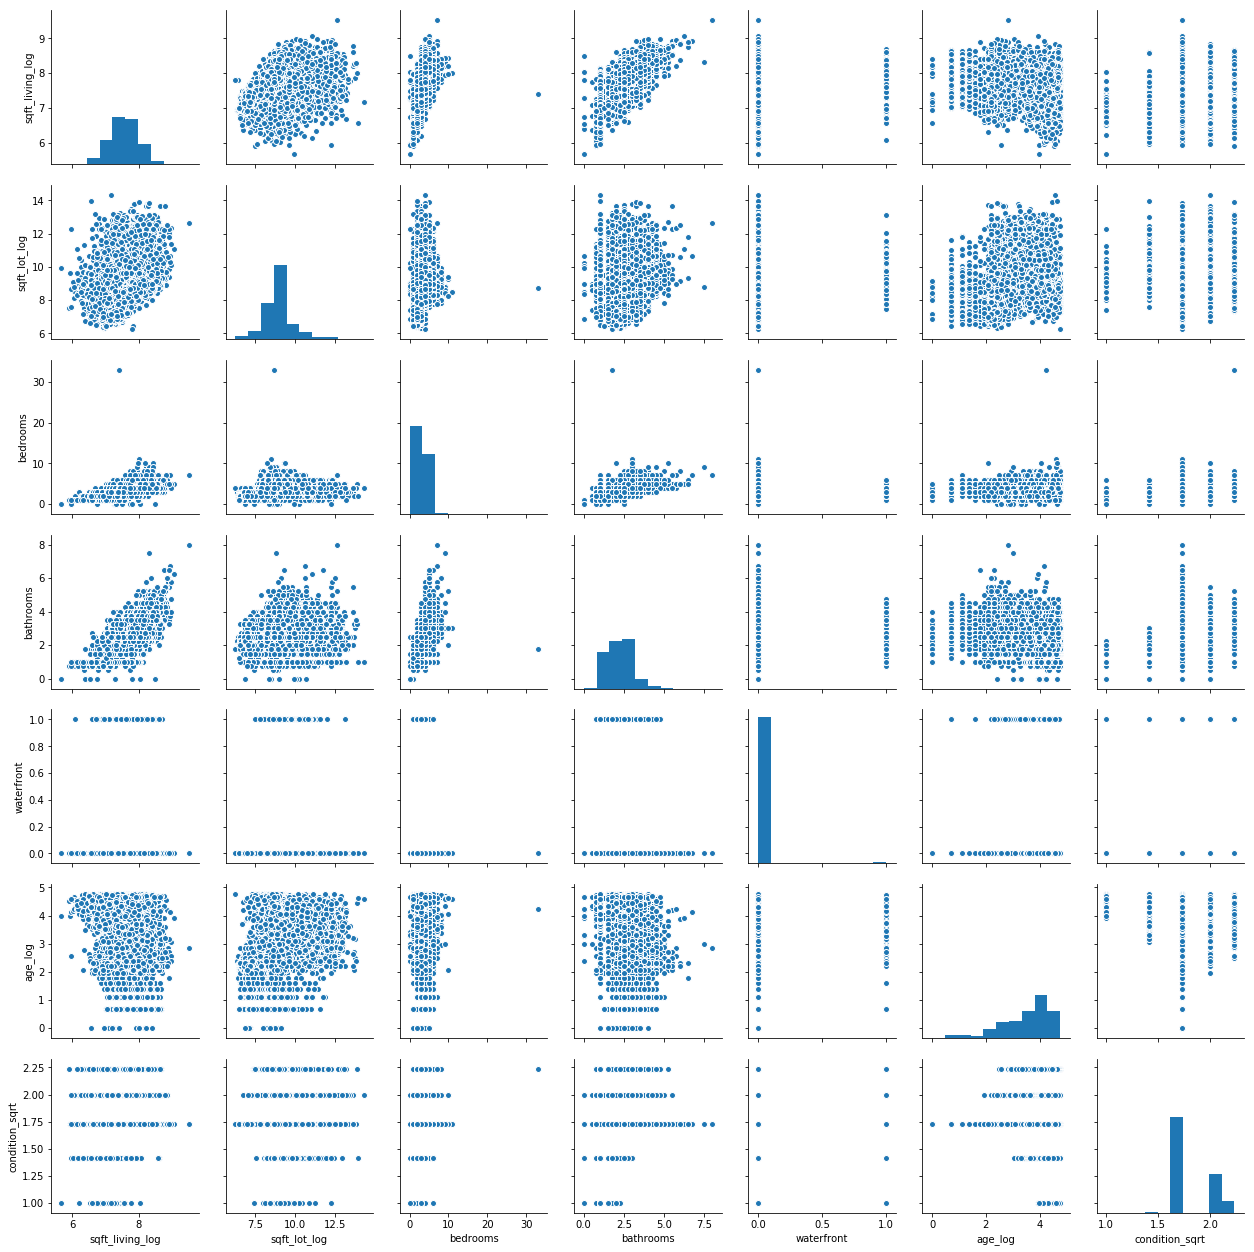

In [22]:
sns.pairplot(features)
plt.show()

## OLS regression

In [27]:
X = features
y = target

In [41]:
lm = LinearRegression()
lm.fit(X, y)

print("Intercept:\n", lm.intercept_)
print("Coefficients:\n", lm.coef_)
print("R^2:\n", lm.score(X, y))

Intercept:
 6.375903727213109
Coefficients:
 [ 0.9017225  -0.07396503 -0.08411645  0.10602308  0.62153146  0.09083567
  0.14314663]
R^2:
 0.5006495693150169


In [42]:
score = cross_val_score(lm, X, y, cv=10)
score

array([0.49845257, 0.51148942, 0.48361414, 0.47506824, 0.45591053,
       0.51884218, 0.50257214, 0.50150343, 0.51477202, 0.39482014])

Maybe some overfitting here?

## KNN Regression

In [35]:
def cross_val_repeat_knn(X, y, cvs, upper_k_limit):
    results = {
        "k_num": [i for i in range(1, upper_k_limit + 1)],
        "mean_r_squared": [],
        "std_r_squared": []
    }
    
    for k in results["k_num"]:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X, y)
        score = cross_val_score(knn, X, y, cv=cvs)
        results["mean_r_squared"].append(np.mean(score))
        results["std_r_squared"].append(np.std(score))
    
    df = pd.DataFrame(results)
    df = df[["k_num", "mean_r_squared", "std_r_squared"]]
    return df

In [39]:
knn_results = cross_val_repeat_knn(X, y, 10, 30)
knn_results

,k_num,mean_r_squared,std_r_squared
0,1,0.195809,0.047681
1,2,0.389430,0.033745
2,3,0.454205,0.029863
3,4,0.485947,0.029860
4,5,0.502945,0.030838
5,6,0.512004,0.029944
6,7,0.518941,0.030014
7,8,0.525157,0.031924
8,9,0.528900,0.031705
9,10,0.533178,0.032322


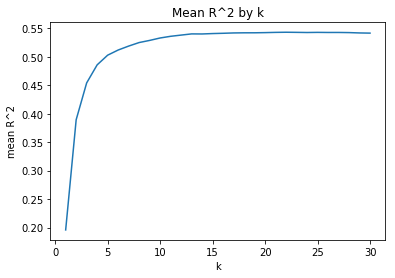

In [45]:
plt.plot(knn_results["k_num"], knn_results["mean_r_squared"])
plt.title("Mean R^2 by k")
plt.xlabel("k")
plt.ylabel("mean R^2")
plt.show()

Looks like things settle down between 10-15 neighbors.

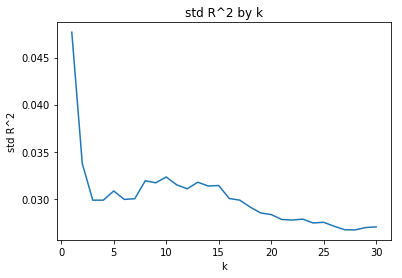

In [46]:
plt.plot(knn_results["k_num"], knn_results["std_r_squared"])
plt.title("std R^2 by k")
plt.xlabel("k")
plt.ylabel("std R^2")
plt.show()

Standard deviation is a bit spikier and doesn't appear to settle until between 23 and 30 neighbors.

## Summary
The OLS regression model explains about 50% of the variance in the data but is potentially overfit. The KNN regression model explains about 54% of the variance in the data (with k >= 12), which is indeed higher than the OLS model, but not much. I would say that these models are similar. That being said, I actually expected the OLS model to outperform the KNN model due to the presence of categorical data in the dataset.

Overall, I  still prefer the OLS model due to that model's ability to explain the individual impact of the variables through the coefficient estimates, which I think is interesting information for further study and understanding. That being said, if all I was interested in was getting the best prediction, then the KNN model would have to be preferred due to the better R-squared score.